In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy.io.matlab import mio
from scipy.stats import norm

In [2]:
def f(x,t):
    out = 0.5 * x + 25.0 * x / (1.0 + x**2) + 8.0 * numpy.cos(1.2 * (t + 1))
    return out

In [3]:
def g(x):
    out = x * x / 20.0
    return out

In [4]:
def normpdf(x, mu, sigma):
    resultat = 1/(sigma * numpy.sqrt(2 * numpy.pi)) * numpy.exp( - (x - mu)**2 / (2 * sigma**2) )
    return resultat

In [5]:
def resample(xtilde, w):
    N = len(xtilde)
    xtilde_new = numpy.zeros(shape = N)
    for i in range(0, N, 1):
        u = numpy.random.uniform(low = 0, high = 1, size = 1)
        j = 0
        sum_W = w[0]
        while (sum_W < u):
            j = j + 1
            sum_W = sum_W + w[j]
        xtilde_new[i] = xtilde[j]
    w_new = (1 / N) * numpy.ones(shape = N)
    return xtilde_new, w_new

In [6]:
data = mio.loadmat('donnees.mat')
x = numpy.array(data['x'])[0]
y = numpy.array(data['z'])[0]
t = numpy.array(data['t'])[0]

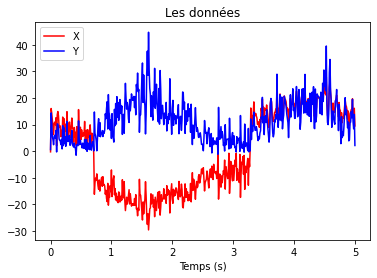

In [7]:
plt.plot(t, x, 'r', label = 'X')
plt.plot(t, y, 'b', label = 'Y')
plt.title('Les données')
plt.xlabel('Temps (s)')
plt.legend()
plt.show()

In [8]:
N = 500
moyenne = 0
ecartType = numpy.sqrt(10)
xtilde = numpy.zeros(shape = (N, len(t)))
xtilde[:,0] = ecartType * numpy.random.randn(N)
wtilde = numpy.zeros(shape = (N, len(t)))
wtilde[:,0] = 1 / N * numpy.ones(shape = N)

In [9]:
xe = numpy.zeros(shape = len(t))
xe[1] = ecartType * numpy.random.randn(1)

In [10]:
for i in range(0, len(t) - 1, 1):
    for j in range(0, N, 1):
        xtilde[j, i + 1] = ecartType * numpy.random.randn(1) + f(xtilde[j, i], t[i])
        wtilde[j, i + 1] = wtilde[j, i] * normpdf(y[i + 1], g(xtilde[j, i + 1]), 1)
    wtilde[:, i + 1] = wtilde[:, i + 1] / numpy.sum(wtilde[:, i + 1])
    # Estimation MMSE
    xe[i + 1] = numpy.dot(xtilde[:, i + 1], wtilde[:, i + 1])
    Neff = 1 / numpy.sum(wtilde[:, i + 1] ** 2)
    if (Neff < N):
        xtilde[:, i + 1], wtilde[:, i + 1] = resample(xtilde[:, i + 1], wtilde[:, i + 1])
        

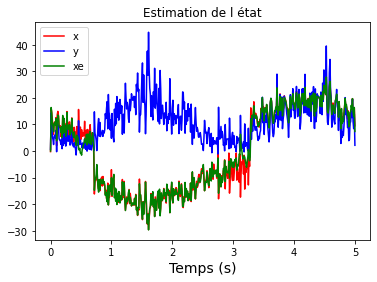

In [11]:
plt.plot(t, x, 'r', label = 'x')
plt.plot(t, y, 'b', label = 'y')
plt.plot(t, xe, 'g', label = 'xe')
plt.title('Estimation de l état')
plt.xlabel('Temps (s)', size = 14)
plt.legend()
plt.show()

In [12]:
erreur = x - xe

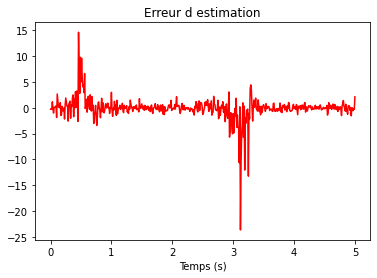

In [13]:
plt.plot(t, erreur, 'r')
plt.title('Erreur d estimation')
plt.xlabel('Temps (s)')
plt.show()